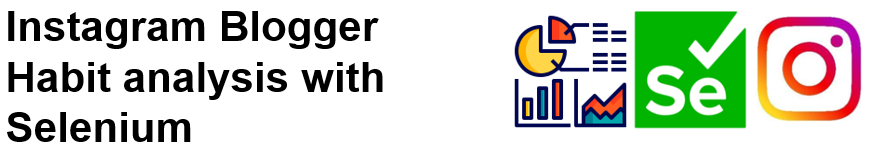

### By Mohamed Irfan 

### Importing necessary libraries

In [171]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service as ChromeService
import time
import warnings
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

### Starting the Driver

In [172]:
warnings.filterwarnings("ignore")

# Setting the path to the ChromeDriver executable

chrome_driver_path = r"C:\Users\irfan\Desktop\chromedriver-win64\chromedriver.exe"  # Update with your actual path

# Creating a ChromeService object with the executable path
chrome_service = ChromeService(executable_path=chrome_driver_path)

# Creating a Chrome WebDriver instance using the service
driver = webdriver.Chrome(service=chrome_service)

In [173]:
driver.maximize_window()

In [174]:
url = 'https://www.instagram.com/'
driver.get(url)

### Log in to your Instagram Handle

In [175]:
username = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, '//*[@id="loginForm"]/div/div[1]/div/label/input')))
username.send_keys('USERNAME')
password = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
password.send_keys('PASSWORD')

login = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'x1nhvcw1')))
for i in login:
    if i.text.strip() == 'Log in':
        i.click()
        break

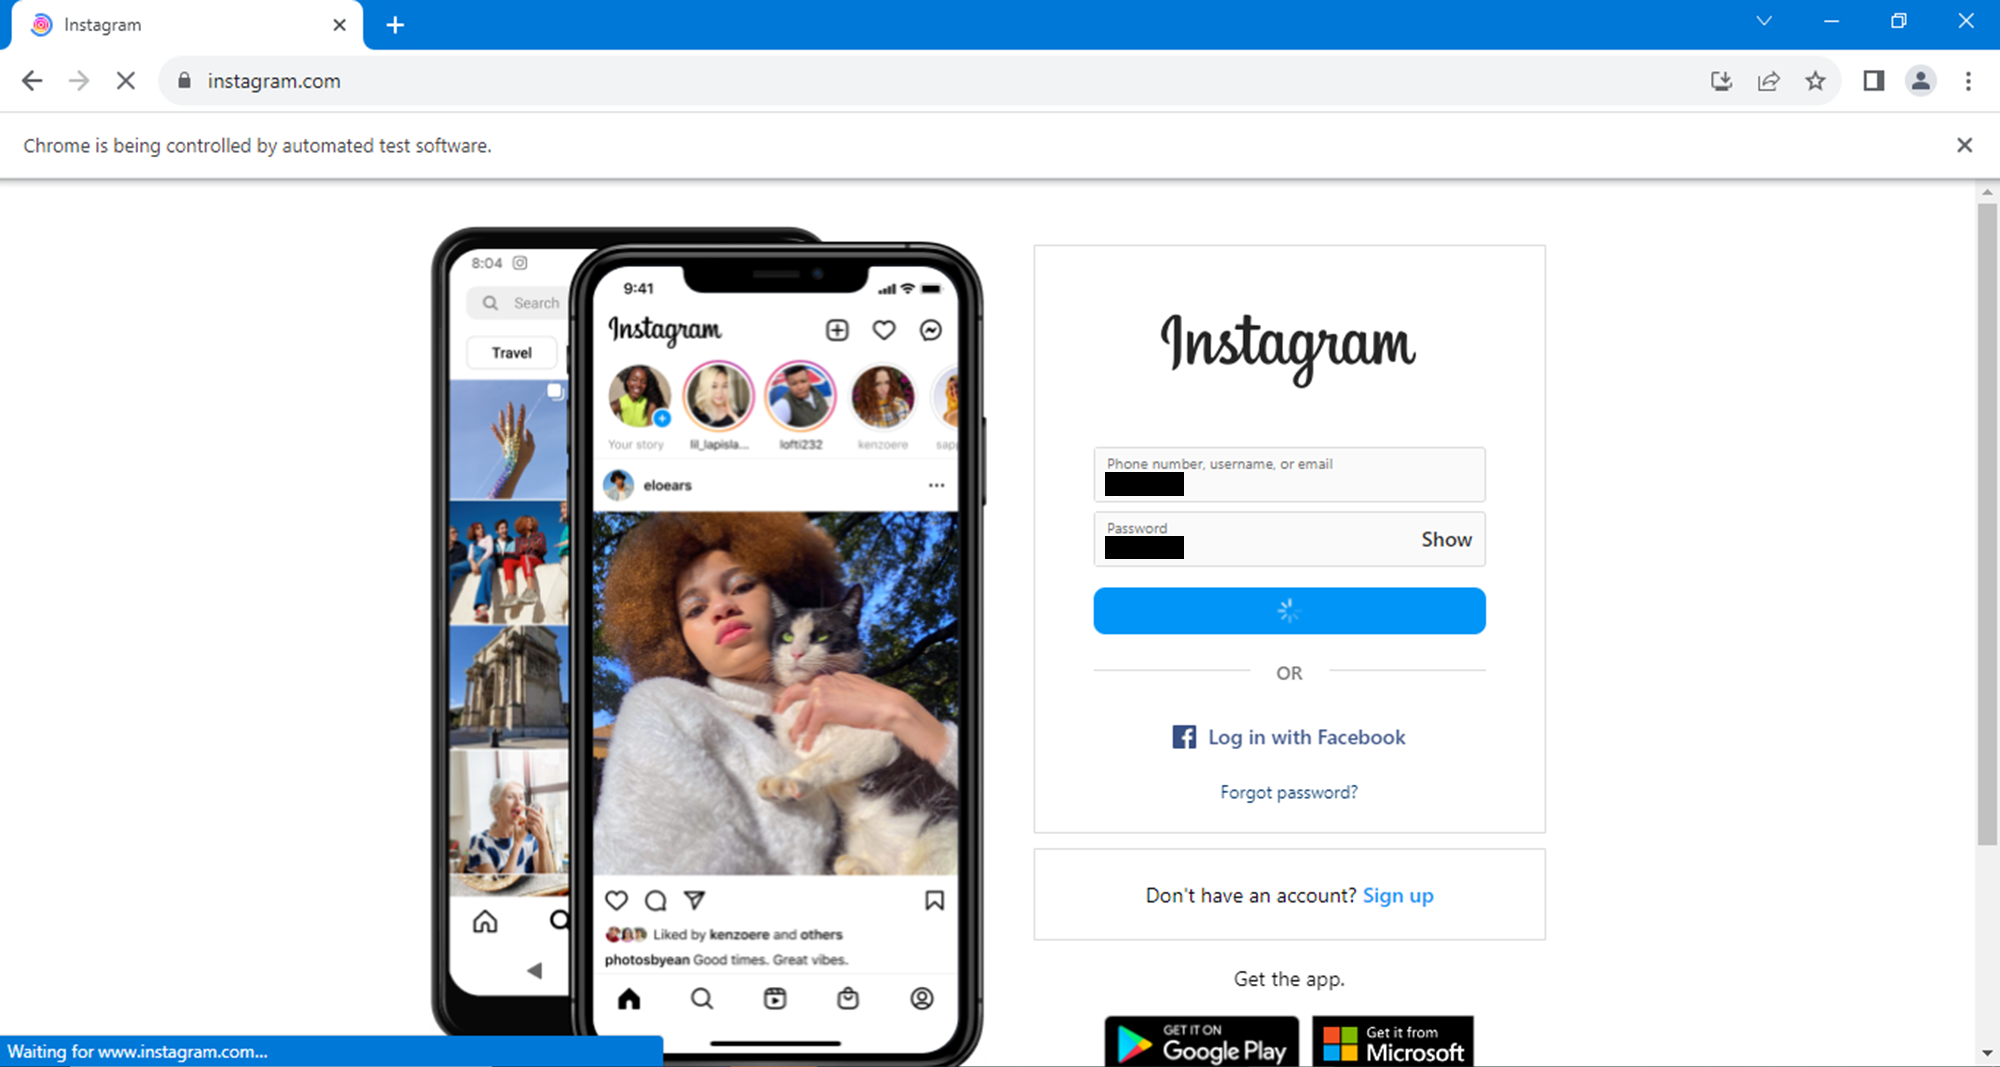

### Type for “food” in search bar and print all the names of the Instagram Handles that are displayed in list after typing “food”

In [7]:
search_button = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'x1ye3gou')))
search_button[3].click()

input_ = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'x7xwk5j')))
input_.send_keys('food')

In [9]:
search_results = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'xocp1fn')))

# to get a list of strings
string_list = search_results[0].text.split('\n')
l =[]
for i in string_list:
    if i[0]!='#' and ' ' not in i:
        if i.upper() != 'FOOD':
            print(i)
            l.append(i)

foodtalkindia
dubaifoodbabes
justfooddxb
JustFood
uaefatboy
dubai_restaurants11
thefoodbabe
tasty_food_vibes
brunchingdubai
food.darzee
so_foody
germany.explores
dubaieats
dubaifoodlads
foodbowlae
mryam.eats
foodphotodubai
foodstylist.dubai
emiratifoodgeeks
foodsheikh
foodiebyzeina
foodkamooddxb
reifkushiyaki
austria.explores
foodphotographer_in_dubai
thebayezeeds
uk.explores
greece.explores
usa.explores
canada.explores
feedkiani
foodavenue
shootme_dubai_
astoryoffood
adeelchaudry1
eatoutdxb
tableeforone
rometravelers
foodaroundae
Foodholic🥩🥐
allveganfooduae
g.rated_food
food4medxb
lizbethology
foodbloggerai
firaskazma
saadatexplores
foodphotish
hangrybird.ae


###  

### Followers count for the top 5 Accounts

In [10]:
def sort_desc_dict(dictionary):
    return dict(sorted(dictionary.items(), key = lambda x: x[1])[::-1])

In [11]:
C = 1
details = {}
for username in l[:10]:
    try:
        # Visiting the user's Instagram profile
        driver.get(url + username)
        
        followers = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "_ac2a")))
        
        # Getting the text of the follower count
        follower_text = followers[0].text.strip()

        # Extracting the numeric part and handle 'K' (kilo) suffix
        if 'K' in follower_text:
            follower_count = float(follower_text.replace('K', '').replace(',', '')) * 1000
        else:
            follower_count = int(follower_text.replace(',', ''))

        details.update({username:int(follower_count)})
        print(f'{username} : {get_likes()}')
        
        C+=1
        
    except Exception as e:
        pass
        
    if C>10:
        break

details = sort_desc_dict(details)


In [12]:
# he dictionary with the top 10 handles and the follower count 
details

{'foodtalkindia': 8988,
 'thefoodbabe': 5951,
 'food.darzee': 2781,
 'justfooddxb': 755,
 'uaefatboy': 573,
 'dubai_restaurants11': 336,
 'brunchingdubai': 288,
 'dubaifoodbabes': 277,
 'tasty_food_vibes': 30,
 'JustFood': 24}

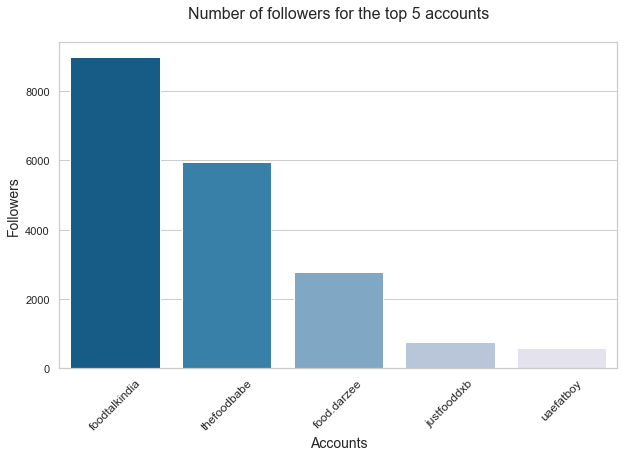

In [217]:

# Getting the first 5 items from the dictionary
first_5_items = dict(list(details.items())[:5])
# Setting a Seaborn style
sns.set_style("whitegrid")

# barplot with customizations
pl.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(x=list(first_5_items.keys()), y=list(first_5_items.values()), palette="PuBu_r")  # Custom color palette
pl.xlabel("Accounts", fontsize=14)  # X-axis label
pl.ylabel("Followers", fontsize=14)  # Y-axis label
pl.title("Number of followers for the top 5 accounts\n", fontsize=16)  # Title
pl.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and increase font size

# Showing the plot
pl.show()

###  

### Post count for the top 5 Accounts in the last 3 days.

In [14]:
list(first_5_items.keys())

['foodtalkindia', 'thefoodbabe', 'food.darzee', 'justfooddxb', 'uaefatboy']

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import time

# Defining a list of usernames
usernames = list(first_5_items.keys())

# Initializing a dictionary to store the post count for each username
post_counts = {}

for username in usernames:
        # Navigating to the Instagram page of the username
        driver.get(f'https://www.instagram.com/{username}/')
        
        # Scrolling through the user's posts
        scroll_flag = True
        while scroll_flag:
                time.sleep(2)
            
                # Finding and clicking the post square
                squares = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aagw')))
                
                for i in range(len(squares[:10])):  # Loop through the first 10 squares
                    # Scrolling the post square into view
                    driver.execute_script("arguments[0].scrollIntoView();", squares[i])
                    
                    # Clicking the post square
                    ActionChains(driver).move_to_element(squares[i]).click().perform()
                    
                    # Checking date
                    _time = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "_aaqe")))
                    
                    input_string = _time[0].text  # Replace with your input string
                    
                    # Checking if "DAY" is in the string
                    if 'DAY' not in input_string:
                        post_count = post_counts.get(username, 0)
                        post_counts[username] = post_count + 1
                    else:
                        # Use of regular expression to extract the number of days
                        days_match = re.search(r'(\d+) DAY', input_string)
                        
                        if days_match:
                            days = int(days_match.group(1))
                        
                            # Checking if the number of days is less than or equal to 3
                            if days <= 3:
                                post_count = post_counts.get(username, 0)
                                post_counts[username] = post_count + 1
                            else:
                                scroll_flag = False
                                break
                    driver.back()


# Printing the post counts for each username
for username, count in post_counts.items():
    print(f'{username}: {count} posts in the previous 3 days')


foodtalkindia: 3 posts in the previous 3 days
thefoodbabe: 5 posts in the previous 3 days
food.darzee: 3 posts in the previous 3 days
justfooddxb: 6 posts in the previous 3 days


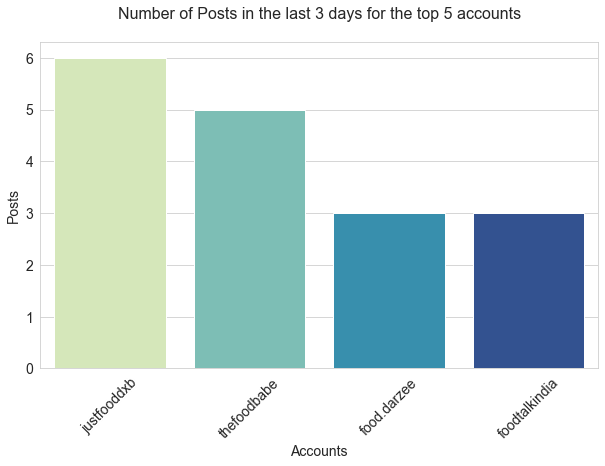

In [168]:
    
sns.set_style("whitegrid")
post_counts = sort_desc_dict(post_counts)
# barplot with customizations
pl.figure(figsize=(10, 6))  # Adjusting the figure size
sns.barplot(x=list(post_counts.keys()), y=list(post_counts.values()), palette="YlGnBu")  # Custom color palette
pl.xlabel("Accounts", fontsize=14)  # X-axis label
pl.ylabel("Posts", fontsize=14)  # Y-axis label
pl.title("Number of Posts in the last 3 days for the top 5 accounts\n", fontsize=16)  # Title
pl.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels and increase font size
pl.yticks(fontsize=14)

# Showing the plot
pl.show()

###  

### Popular Hashtags among the top 5 Accounts in the last 3 days

In [70]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import time#  

# Defining a list of usernames
usernames = list(first_5_items.keys())

# Initializing a dictionary to store the hashtags
tags={}

for username in usernames:
                # Navigating to the Instagram page of the username
                driver.get(f'https://www.instagram.com/{username}/')
                # Finding and clicking the post square
                squares = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aagw')))
                
                for i in range(len(squares[:10])):  # Loop through the first 10 squares
                    # Scrolling the post square into view
                    driver.execute_script("arguments[0].scrollIntoView();", squares[i])
                    
                    # Clicking the post square
                    ActionChains(driver).move_to_element(squares[i]).click().perform()
                    
                    hash_ = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "x1i10hfl ")))
                    for i in hash_:
                        if '#' in i.text:
                            if i.text in tags.keys():
                                tags[i.text] += 1
                            else:
                                tags[i.text]=1
                        else:
                            pass
                    driver.back()



In [74]:
sort_desc_dict(tags)

{'#fooddarzee': 9,
 '#healthyfood': 5,
 '#discover': 3,
 '#yummy': 3,
 '#delicious': 3,
 '#foodtalkindia': 3,
 '#food': 3,
 '#delhincr': 3,
 '#funnyvideos': 2,
 '#coacheddarzee': 2,
 '#trending': 2,
 '#HealthyEating': 2,
 '#britishfood': 1,
 '#itswhatsfordinner': 1,
 '#shepherdspierecipe': 1,
 '#shepherdspie': 1,
 '#ShopsYouLoveDeliveredBetter': 1,
 '#InstaShop': 1,
 '#InstaShopApp': 1,
 '#theexceptionalchefseries': 1,
 '#michelinstar': 1,
 '#michelin': 1,
 '#abudhabifood': 1,
 '#dubaicafe': 1,
 '#dubaibreakfastspots': 1,
 '#dubaibreakfast': 1,
 '#italiansub': 1,
 '#italiansandwich': 1,
 '#italiandeli': 1,
 '#kebab': 1,
 '#persianfood': 1,
 '#iranfood': 1,
 '#iranianfood': 1,
 '#deli': 1,
 '#sandwiches': 1,
 '#sandwichesofinstagram': 1,
 '#sharjahfood': 1,
 '#falafelsandwich': 1,
 '#falafels': 1,
 '#falafel': 1,
 '#darkchocolate': 1,
 '#chocolatebar': 1,
 '#sweettooth': 1,
 '#milkchocolate': 1,
 '#chocolateoverload': 1,
 '#chocolatedessert': 1,
 '#chocolatelove': 1,
 '#chocolatesauce':

In [164]:
tags = sort_desc_dict(tags)


# Creating a DataFrame for the hastags and their frequencies
df = pd.DataFrame(tags.items(), columns=['Hashtag', 'Hashtag_count'])

In [165]:
# Exporting the DataFrame to a .csv file
df.to_csv('C:\\Users\\irfan\\Desktop\\Hashtags.csv',index=False)

In [166]:
# Reading the DataFrame from the .csv file

df = pd.read_csv('C:\\Users\\irfan\\Desktop\\Hashtags.csv')
df.index = df['Hashtag']
df.drop('Hashtag', axis = 1 , inplace = True)
df.head()

,Hashtag_count
Hashtag,
#fooddarzee,9
#healthyfood,5
#delhincr,3
#food,3
#foodtalkindia,3


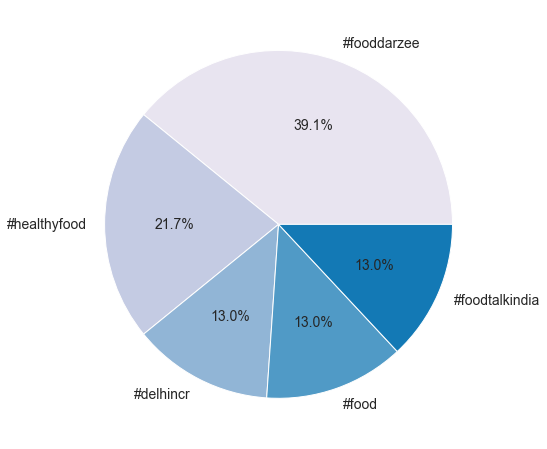

In [167]:
# Plotting a pie chart for the top 5 hashtags obtained and the number of times they were used
sns.set_palette('PuBu')
pl.figure(figsize = (8,8))
pl.pie(df.head(5)['Hashtag_count'], labels=df.head(5).index, autopct='%1.1f%%', textprops={'fontsize': 14})
pl.show()

###   

### Average followers : likes ratio for the top 5 Accounts in the last 3 days

In [187]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import time

# Defining a list of usernames
usernames = list(first_5_items.keys())

# Initializing a dictionary to store the post count for each username
like_counts = {}

for username in usernames:
        # Navigating to the Instagram page of the username
        driver.get(f'https://www.instagram.com/{username}/')
        
        # Scrolling through the user's posts
        scroll_flag = True
        while scroll_flag:
                time.sleep(2)
                # Finding and clicking the post square
                squares = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_aagw')))
                
                followers = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "_ac2a")))

                # Getting the text of the follower count
                follower_text = followers[0].text.strip()

                # Extracting the numeric part and handle 'K' (kilo) suffix
                if 'K' in follower_text:
                    follower_count = float(follower_text.replace('K', '').replace(',', '')) * 1000
                else:
                    follower_count = int(follower_text.replace(',', ''))                 
                
                like_counts[username] = [0,follower_count]                    
                    
                for i in range(len(squares[:10])):  # Looping through the first 10 squares
                    # Scrolling the post square into view
                    driver.execute_script("arguments[0].scrollIntoView();", squares[i])
                    
                    # Clicking the post square
                    ActionChains(driver).move_to_element(squares[i]).click().perform()   
    
                    # Checking date
                    try:
                        like_count = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_ae5o')))
                        count = int(like_count.text.replace(' likes', '').replace(',', ''))
                        like_counts[username][0] += count
                    
                    except Exception as e:
                        pass
                    driver.back()
                scroll_flag = False

# Printing the followers and like counts for each username
for username, count in like_counts.items():
    print(f'{username} has {count[0]} followers and a total of {count[1]} likes')

foodtalkindia has 2145 followers and a total of 8990 likes
thefoodbabe has 17112 followers and a total of 5951 likes
food.darzee has 2124 followers and a total of 2782 likes
justfooddxb has 516352 followers and a total of 756 likes
uaefatboy has 938 followers and a total of 573 likes


In [198]:
# Calculating the average followers:like ratio 
avg = {}
for value in like_counts.items():
    # appending the values to a dictionary 'avg'
    avg[value[0]] = (value[1][1]*0.1)/value[1][0]
    

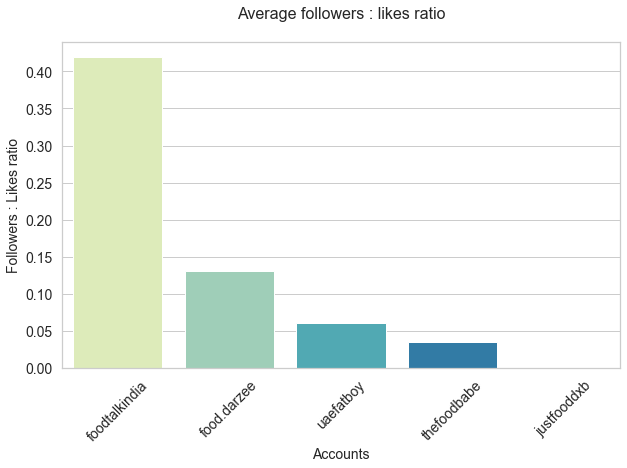

In [212]:
sns.set_style("whitegrid")
post_counts = sort_desc_dict(avg)
# barplot with customizations
pl.figure(figsize=(10, 6))  # Adjusting the figure size
sns.barplot(x=list(post_counts.keys()), y=list(post_counts.values()), palette="YlGnBu")  # Custom color palette
pl.xlabel("Accounts", fontsize=14)  # X-axis label
pl.ylabel("Followers : Likes ratio", fontsize=14)  # Y-axis label
pl.title("Average followers : likes ratio\n", fontsize=16)  # Title
pl.xticks(rotation=45, fontsize=14)  # Rotating x-axis labels and increase font size
pl.yticks(fontsize=14)

# Showing the plot
pl.show()